# 6002 Project

### Antoniadis Christoforos , Kontoudakis Nikolaos, Tsamoura Evgenia 

In [3]:
# import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.naive_bayes import BernoulliNB


In [4]:
# change the following on your pc!
projectPath = "/home/nikos/Documents/6002_project"
dataPath = projectPath + "/smp500.csv"

In [5]:
smp500 = pd.read_csv(dataPath, sep= ',', header= 0, names=["date",	"open",	"high",	"low", "close",	"adj. close", "volume"])
smp500 = smp500.drop(columns = ["adj. close"])
smp500['date'] = pd.to_datetime(smp500['date'])
# set date as key
smp500= smp500.set_index(smp500['date']).drop(columns='date')
smp500

,open,high,low,close,volume
date,,,,,
2024-11-29,6003.98,6044.17,6003.98,6032.38,2444420000
2024-11-27,6014.11,6020.16,5984.87,5998.74,3363340000
2024-11-26,6000.03,6025.42,5992.27,6021.63,3835170000
2024-11-25,5992.28,6020.75,5963.91,5987.37,5633150000
2024-11-22,5944.36,5972.90,5944.36,5969.34,4141420000
...,...,...,...,...,...
2022-01-07,4697.66,4707.95,4662.74,4677.03,4181510000
2022-01-06,4693.39,4725.01,4671.26,4696.05,4295280000
2022-01-05,4787.99,4797.70,4699.44,4700.58,4887960000


### Data validation

In [7]:
print("There are %s na values" %(smp500.isna().sum().sum()))
print("There are %s zero values" % (smp500[smp500 == 0].sum(numeric_only=True).sum()))

# Check inconsistencies
# at every row low must be the lowest value
print("There are %s rows that the low of the row is higher than any other value" % (smp500[(smp500.low> smp500.high) & (smp500.low> smp500.close) & (smp500.low > smp500.open)].sum(numeric_only=True).sum()))

There are 0 na values
There are 0.0 zero values
There are 0.0 rows that the low of the row is higher than any other value


### Outlier Removal

In [9]:
#check the values of each row per specific column for outliers
def removeOutliers(columnName):
    Zsmp500 = (smp500[columnName] - np.mean(smp500[columnName])) / np.std(smp500[columnName])
    return Zsmp500[(Zsmp500 > 3 ) | (Zsmp500 < -3 )].index
    
# run the function for every column
# smp500= smp500.drop(removeOutliers('open'), axis= 0).drop(removeOutliers('high'), axis= 0).drop(removeOutliers('low'), axis= 0).drop(removeOutliers('close'), axis= 0).drop(removeOutliers('volume'), axis= 0)
removeOutliers('volume')

DatetimeIndex(['2024-09-20', '2024-06-28', '2024-06-21', '2024-03-15',
               '2023-12-15', '2023-09-15', '2023-06-16', '2023-03-17',
               '2022-12-16', '2022-09-16', '2022-06-24', '2022-06-17',
               '2022-05-31', '2022-03-18', '2022-03-08', '2022-03-07',
               '2022-02-24', '2022-01-24'],
              dtype='datetime64[ns]', name='date', freq=None)

### Ploting

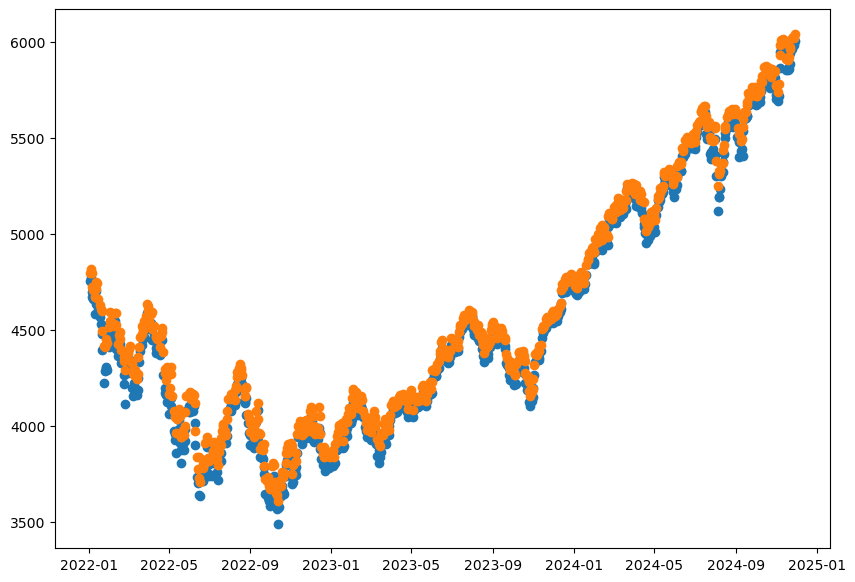

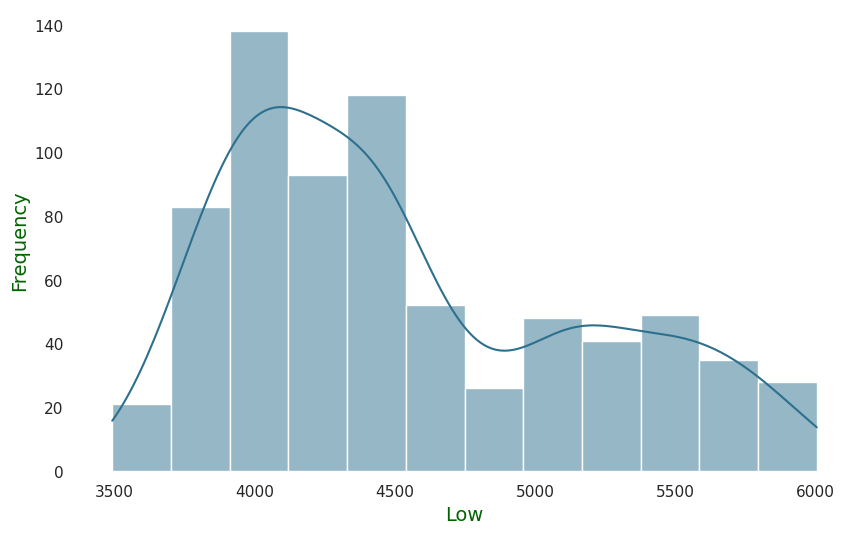

In [11]:
#scater plot
plt.figure(figsize=(10, 7))
plt.scatter(y= smp500.low, x =smp500.index)
plt.scatter(y= smp500.high, x =smp500.index)

# histogram
sns.set(style="white")
colors = sns.color_palette("viridis", n_colors=10)

# plotting the SAT score distribution using Seaborn with a KDE (Kernel Density Estimate) plot
plt.figure(figsize=(10, 6))
# sns.histplot(smp500.open, kde=True, color=colors[0])
# sns.histplot(smp500.close, kde=True, color=colors[1])
# sns.histplot(smp500.high, kde=True, color=colors[2])
sns.histplot(smp500.low, kde=True, color=colors[3])
# sns.histplot(smp500.volume, kde=True, color=colors[3])

# Remove left and bottom spines to eliminate the box
sns.despine(left=True, bottom=True)

# set the title and labels
# plt.title("SAT Score Distribution", fontsize=18, color='darkgreen')
plt.xlabel("Low", fontsize=14, color='darkgreen')
plt.ylabel("Frequency", fontsize=14, color='darkgreen')


# display the plot
plt.show()

# Q2

### Naive Aproach

In [14]:
smp500.sort_values(by= 'date', ascending= True)['2022-01-03':'2022-01-31'].drop(columns = 'volume').mean()

open     4585.2630
high     4619.5760
low      4528.0420
close    4573.8155
dtype: float64

In [15]:
def rollingWindow():
    import pandas as pd  # Ensure pandas is imported

    month = 1
    averageValues = []
    while month <= 12:
        # Create the start and end dates as datetime objects
        start = pd.Timestamp(year=2022, month=month, day=1)
        end_month = (month + 2) if (month + 2) <= 12 else (month + 2) - 12
        end_year = 2022 if (month + 2) <= 12 else 2023
        end = pd.Timestamp(year=end_year, month=end_month, day=27)
        
        # Filter data and calculate rolling mean
        data_in_range = smp500.loc[start:end]
        print(smp500.loc[start:end])
        rolling_mean = data_in_range['close'].rolling(len(data_in_range)).mean()
        averageValues.append(rolling_mean)
        
        month += 1
    return averageValues

In [16]:
# Calculate 30-day Simple Moving Average (SMA)
# smp500['close'] = smp500['close'].rolling(len(smp500['2022-01-03':'2022-03-31'])).mean()
# smp500['close'] = smp500['close'].rolling(len(smp500['2022-01-03':'2022-03-31'])).mean()
# smp500['close'] = smp500['close'].rolling(len(smp500['2022-01-03':'2022-03-31'])).mean()

# df.index = pd.to_datetime(df.index)

# df.index = pd.to_datetime(df.index)

# Group by year and month and calculate row number for each month
smp500['month_row_number'] = smp500.groupby([smp500.index.year, smp500.index.month]).cumcount() + 1

# Display the updated DataFrame
print(smp500[['month_row_number']])

            month_row_number
date                        
2024-11-29                 1
2024-11-27                 2
2024-11-26                 3
2024-11-25                 4
2024-11-22                 5
...                      ...
2022-01-07                16
2022-01-06                17
2022-01-05                18
2022-01-04                19
2022-01-03                20

[732 rows x 1 columns]
